### Exercises

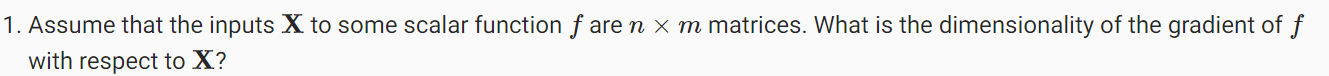

If we have matrix X which is n x m - the corresponding gradient will have the same size, because f is computed with the help of X, and we want to know, how each variable in X will affect the f with a little nudge 

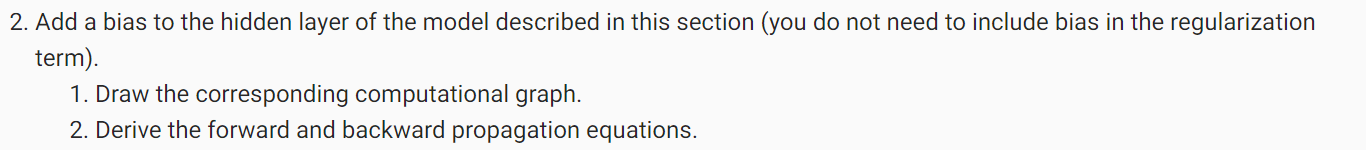

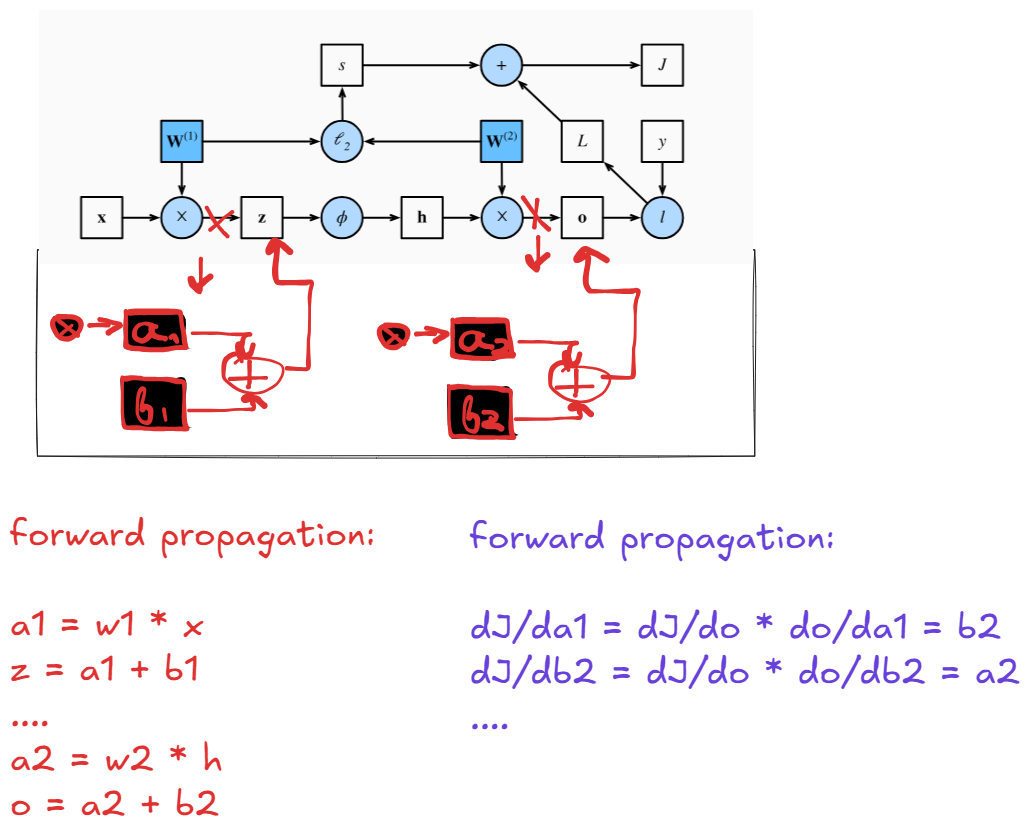

In [1]:
import sys
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import warnings
from torchviz import make_dot
from d2l import torch as d2l

In [2]:
class TinyNetwork(d2l.Module):
  def __init__(self, num_outputs, num_hiddens, lr):
    super().__init__()
    self.save_hyperparameters()
    
    layers = []
    for i in range(len(num_hiddens)):
      layers.append(nn.LazyLinear(num_hiddens[i]))
      layers.append(nn.ReLU())
    
    layers.append(nn.LazyLinear(num_outputs))
    
    self.net = nn.Sequential(*layers)
    
  def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), lr=self.lr)
  
  def loss(self, y_hat, y):
    L = nn.MSELoss()
    
    weights = []
    for name,param in self.net.named_parameters():
      if "weight" in name:
        weights.append(param)
    
    S = sum([(weight.norm()**2).item() for weight in weights])
    
    return L(y_hat, y) + S

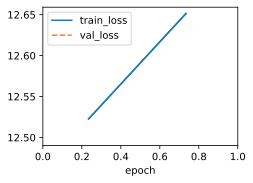

In [3]:
model = TinyNetwork(5, [10, 10], lr=0.01)
x = d2l.SyntheticRegressionData(w=torch.randn(size=(5, )), b=torch.ones(1))
trainer = d2l.Trainer(max_epochs=1)
trainer.fit(model, x)

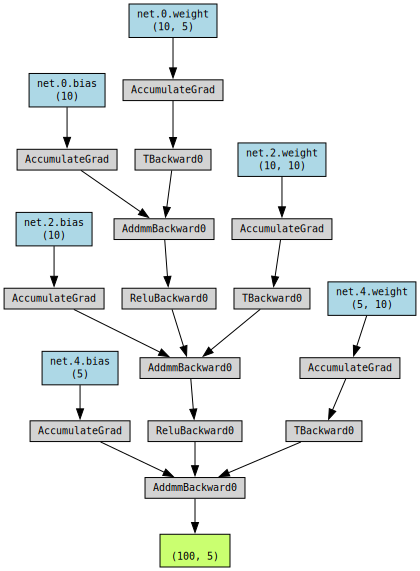

In [4]:
x = torch.randn(100, 5)
y = model(x)

make_dot(y, params=dict(model.named_parameters()))

In [6]:
from torchsummary import summary

x = torch.randn(100, 5)
y = model(x)
summary(model, input_size=(1, 5), device="cpu")

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Linear: 2-1                       60
|    └─ReLU: 2-2                         --
|    └─Linear: 2-3                       110
|    └─ReLU: 2-4                         --
|    └─Linear: 2-5                       55
Total params: 225
Trainable params: 225
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Linear: 2-1                       60
|    └─ReLU: 2-2                         --
|    └─Linear: 2-3                       110
|    └─ReLU: 2-4                         --
|    └─Linear: 2-5                       55
Total params: 225
Trainable params: 225
Non-trainable params: 0

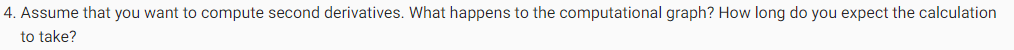

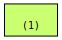

In [23]:
x = torch.tensor([3.0], requires_grad=True)

make_dot(x)

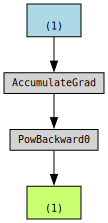

In [24]:
y = x**3

make_dot(y)

In [27]:
grad_1 = torch.autograd.grad(y, x, create_graph=True)[0]
grad_1

tensor([27.], grad_fn=<MulBackward0>)

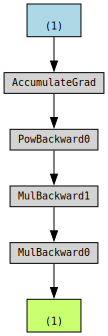

In [28]:
make_dot(grad_1)

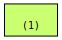

In [29]:
grad_2 = torch.autograd.grad(grad_1, x)[0]
make_dot(grad_2)

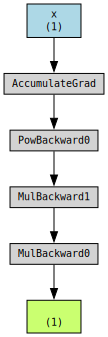

In [31]:
x = torch.tensor([3.0], requires_grad=True)
y = x**3

# Calculate 1st derivative
grad_1 = torch.autograd.grad(y, x, create_graph=True)[0]

# Visualize the graph leading to grad_1
# This shows the path from x -> y -> grad_1
params = {"x": x}
make_dot(grad_1, params=params)

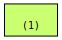

In [32]:
x = torch.tensor([3.0], requires_grad=True)
y = x**3

# Calculate 1st derivative
grad_1 = torch.autograd.grad(y, x, create_graph=False)[0]

# Visualize the graph leading to grad_1
# This shows the path from x -> y -> grad_1
params = {"x": x}
make_dot(grad_1, params=params)